<a href="https://colab.research.google.com/github/siddheshabhang/Obesity-Risk-Classifier/blob/siddhesh/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
url = "https://raw.githubusercontent.com/siddheshabhang/Obesity-Risk-Classifier/master/Obesity_Risk%20Dataset/train.csv"
df = pd.read_csv(url)

display(df.head())

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,WeightCategory
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


## Exploratory Data Analysis (EDA)

In [ ]:
print(df.shape)
df.info()

(15533, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15533 entries, 0 to 15532
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15533 non-null  int64  
 1   Gender                          15533 non-null  object 
 2   Age                             15533 non-null  float64
 3   Height                          15533 non-null  float64
 4   Weight                          15533 non-null  float64
 5   family_history_with_overweight  15533 non-null  object 
 6   FAVC                            15533 non-null  object 
 7   FCVC                            15533 non-null  float64
 8   NCP                             15533 non-null  float64
 9   CAEC                            15533 non-null  object 
 10  SMOKE                           15533 non-null  object 
 11  CH2O                            15533 non-null  float64
 12  SCC                 

In [ ]:
df.isnull().sum()

,0
id,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
print(df.columns.tolist())

['id', 'Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'WeightCategory']


In [ ]:
numerical_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
categorical_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC',
                    'SMOKE', 'SCC', 'CALC', 'MTRANS']
target_column = 'WeightCategory'


Weight Category Distribution:
WeightCategory
Obesity_Type_III       2983
Obesity_Type_II        2403
Normal_Weight          2345
Obesity_Type_I         2207
Overweight_Level_II    1881
Insufficient_Weight    1870
Overweight_Level_I     1844
Name: count, dtype: int64


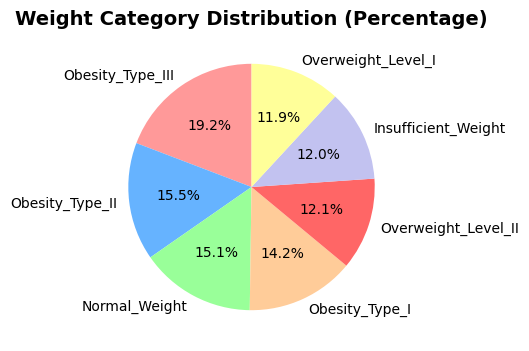

In [ ]:
#Target Variable Analysis
print("\nWeight Category Distribution:")
target_counts = df['WeightCategory'].value_counts()
print(target_counts)

plt.figure(figsize=(4, 4))
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ff6666', '#c2c2f0', '#ffff99']
plt.pie(target_counts.values, labels=target_counts.index, autopct='%1.1f%%',
        startangle=90, colors=colors, textprops={'fontsize': 10})

plt.title('Weight Category Distribution (Percentage)', fontsize=14, fontweight='bold')
plt.savefig('weight_category_distribution.png')
plt.show()

                Age        Height        Weight          FCVC           NCP  \
count  15533.000000  15533.000000  15533.000000  15533.000000  15533.000000   
mean      23.816308      1.699918     87.785225      2.442917      2.760425   
std        5.663167      0.087670     26.369144      0.530895      0.706463   
min       14.000000      1.450000     39.000000      1.000000      1.000000   
25%       20.000000      1.630927     66.000000      2.000000      3.000000   
50%       22.771612      1.700000     84.000000      2.342220      3.000000   
75%       26.000000      1.762921    111.600553      3.000000      3.000000   
max       61.000000      1.975663    165.057269      3.000000      4.000000   

               CH2O           FAF           TUE  
count  15533.000000  15533.000000  15533.000000  
mean       2.027626      0.976968      0.613813  
std        0.607733      0.836841      0.602223  
min        1.000000      0.000000      0.000000  
25%        1.796257      0.007050     

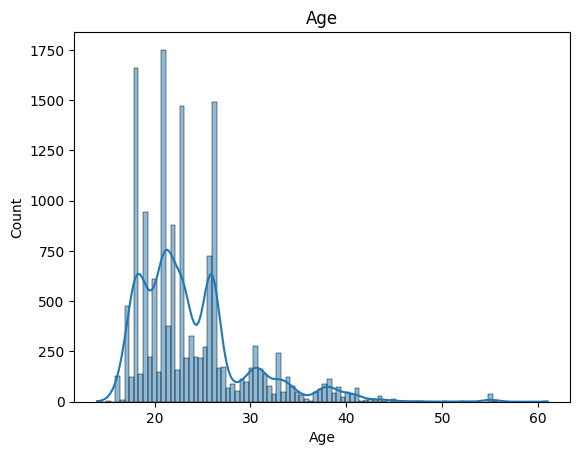

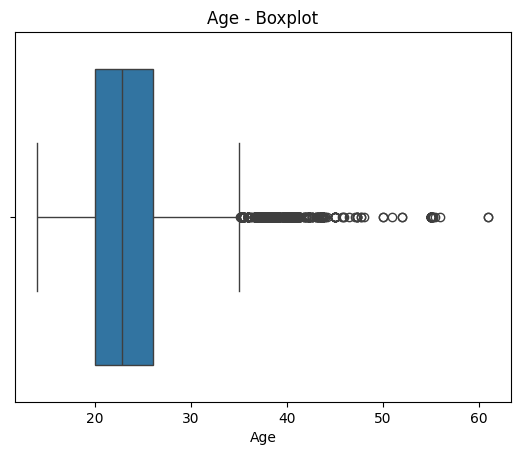

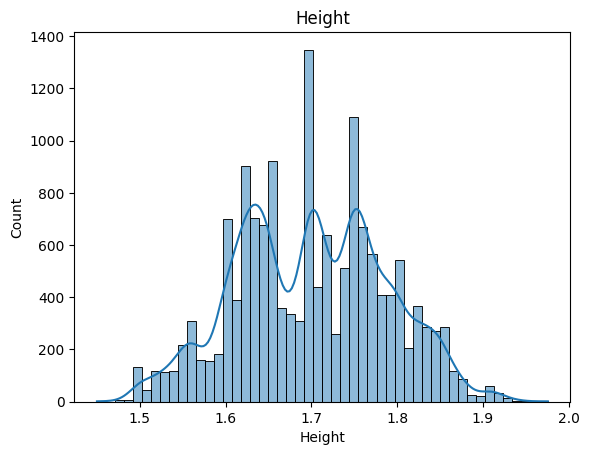

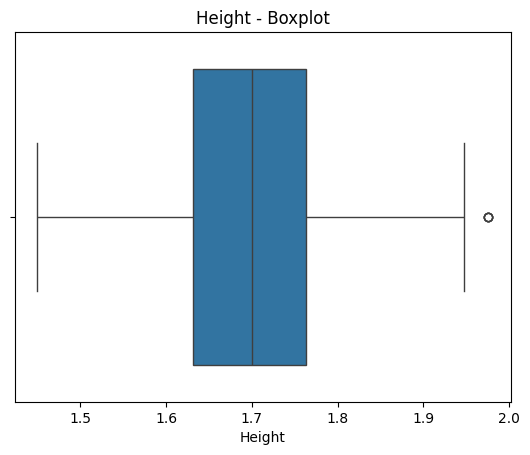

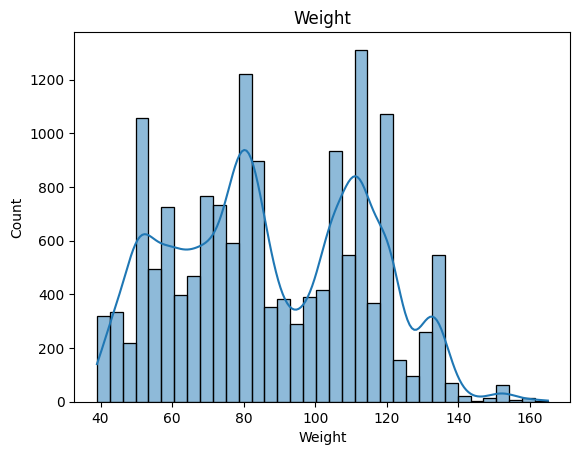

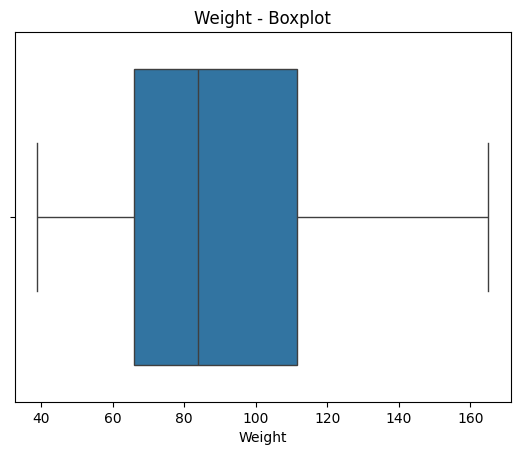

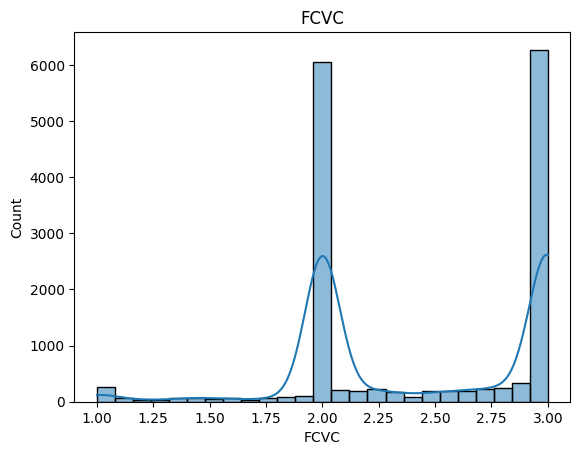

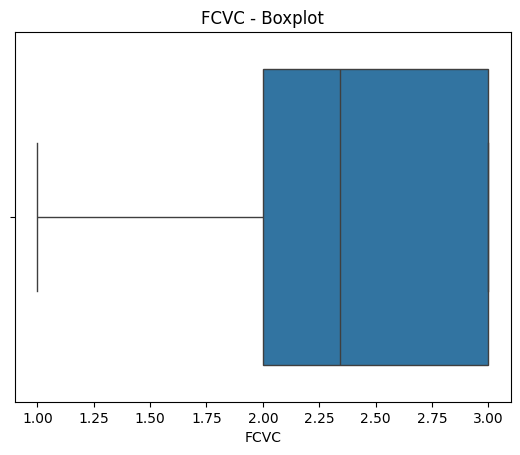

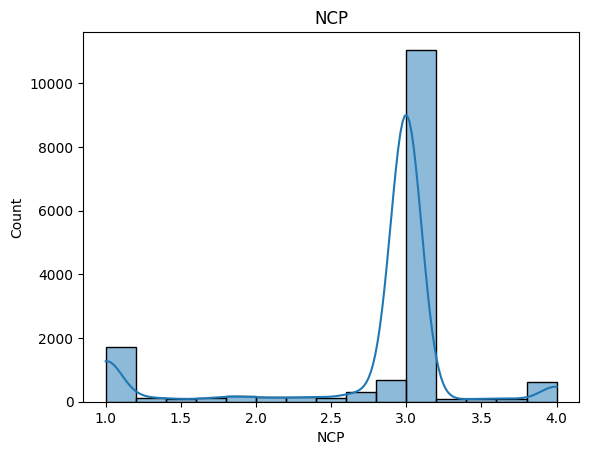

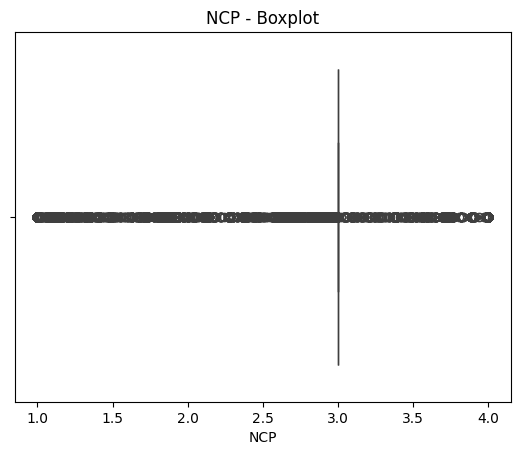

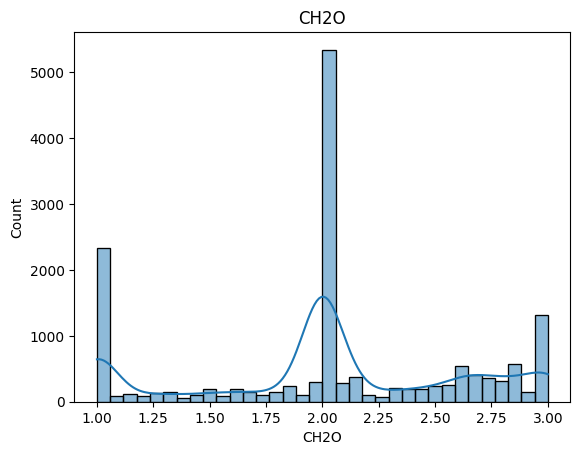

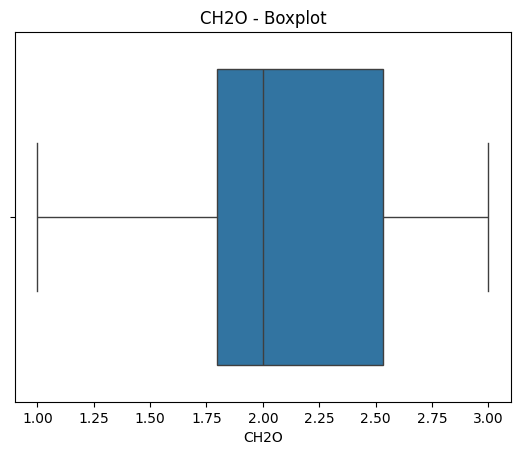

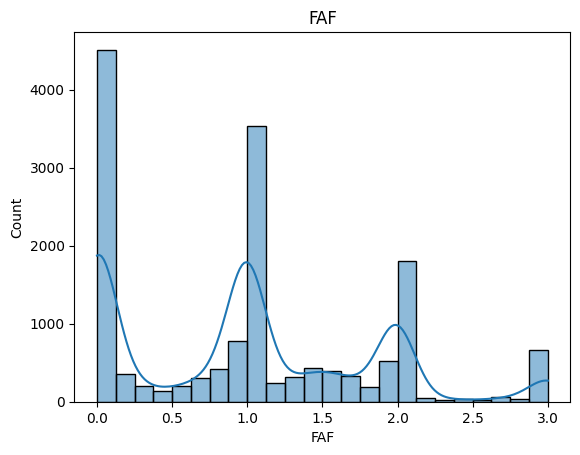

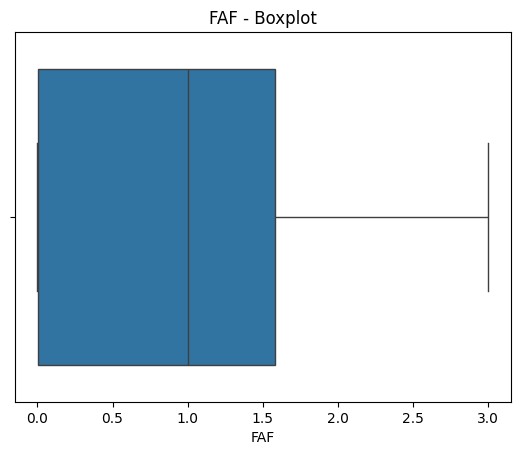

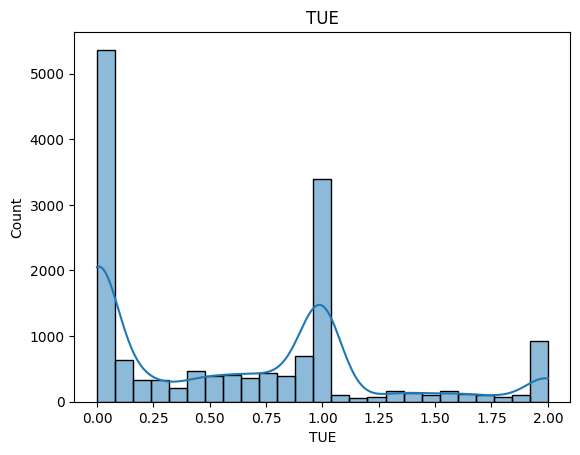

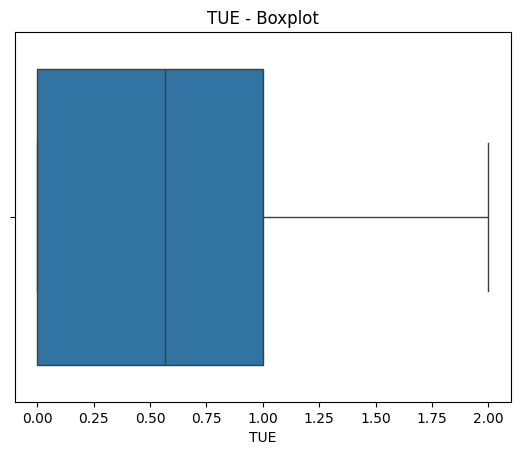

In [ ]:
#Univariate Analysis
print(df[numerical_cols].describe())

for col in numerical_cols:
    sb.histplot(df[col], kde=True)
    plt.title(col)
    plt.savefig(f'{col}_histplot.png')
    plt.show()

    sb.boxplot(x=df[col])
    plt.title(col + " - Boxplot")
    plt.show()

Gender
Male      7783
Female    7750
Name: count, dtype: int64


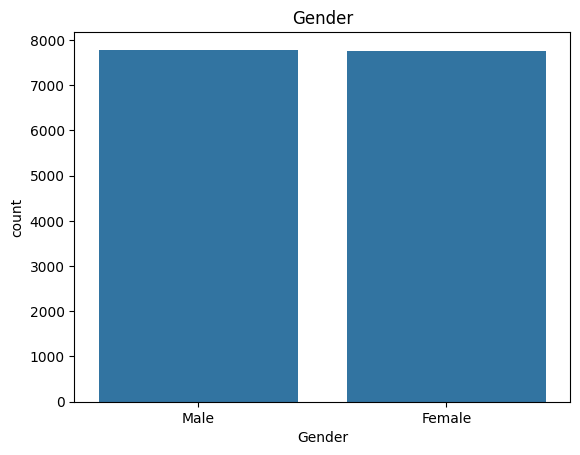

family_history_with_overweight
yes    12696
no      2837
Name: count, dtype: int64


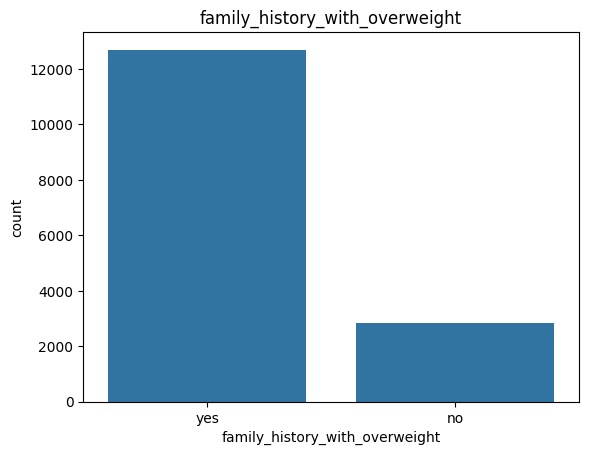

FAVC
yes    14184
no      1349
Name: count, dtype: int64


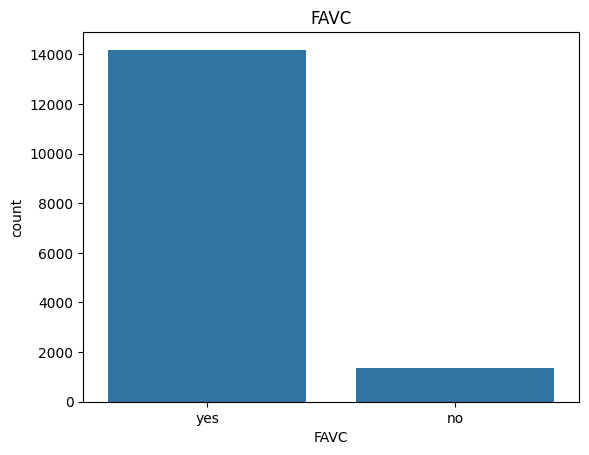

CAEC
Sometimes     13126
Frequently     1858
Always          346
no              203
Name: count, dtype: int64


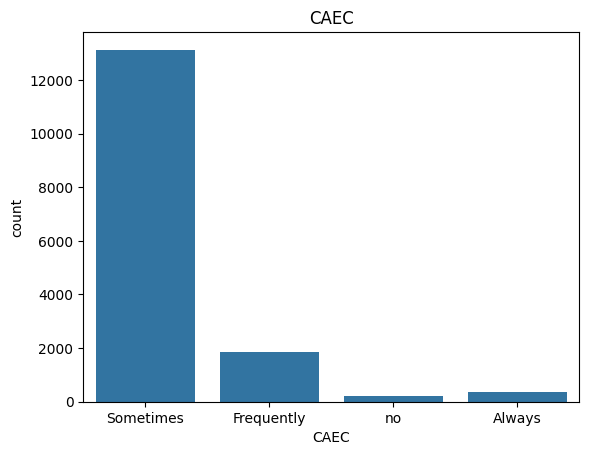

SMOKE
no     15356
yes      177
Name: count, dtype: int64


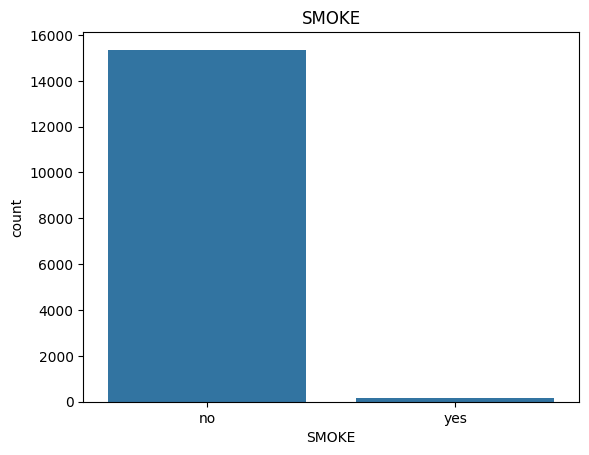

SCC
no     15019
yes      514
Name: count, dtype: int64


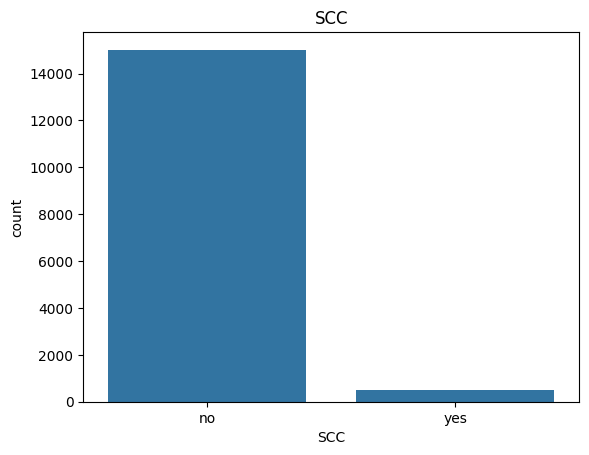

CALC
Sometimes     11285
no             3841
Frequently      407
Name: count, dtype: int64


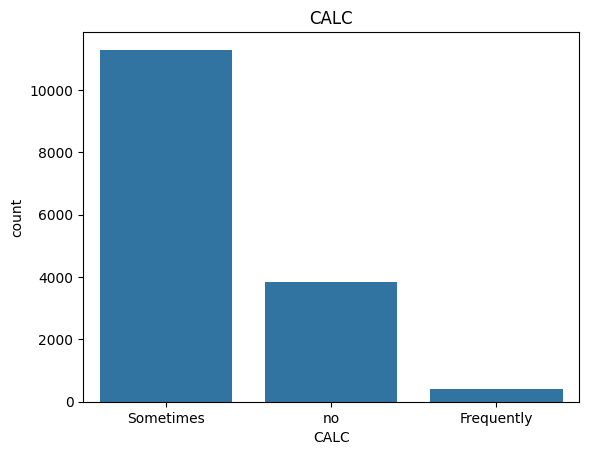

MTRANS
Public_Transportation    12470
Automobile                2669
Walking                    340
Motorbike                   30
Bike                        24
Name: count, dtype: int64


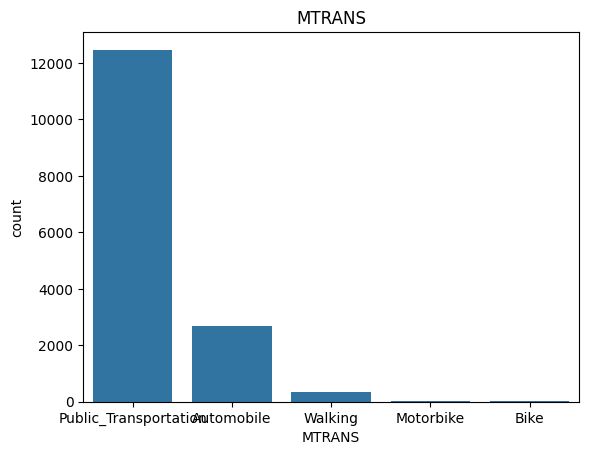

In [ ]:
for col in categorical_cols:
    print(df[col].value_counts())
    sb.countplot(x=col, data=df)
    plt.title(col)
    plt.savefig(f'{col}_countplot.png')
    plt.show()

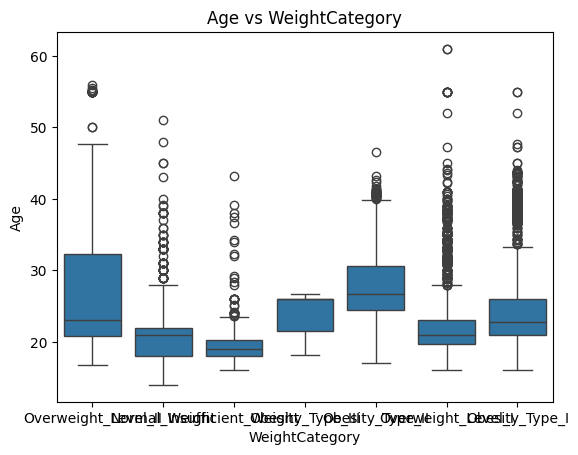

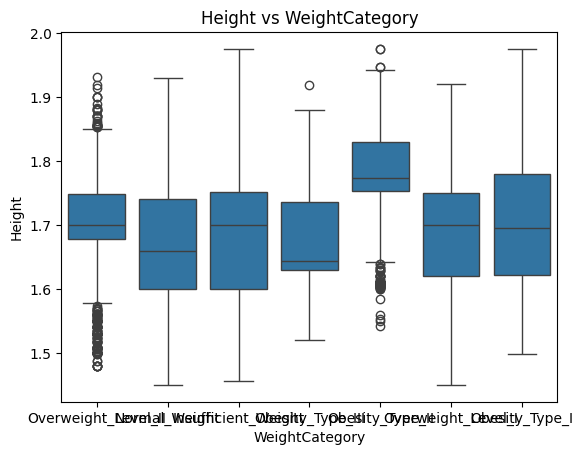

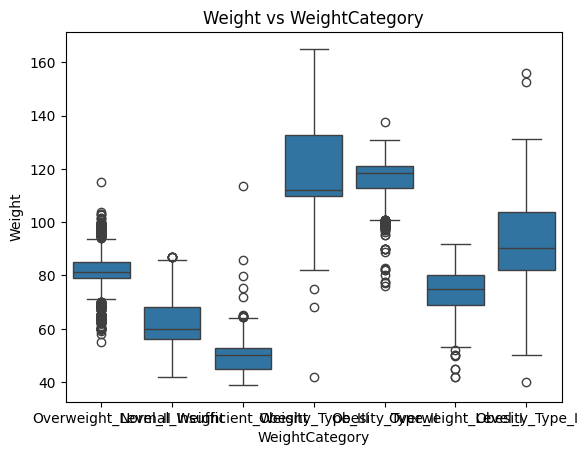

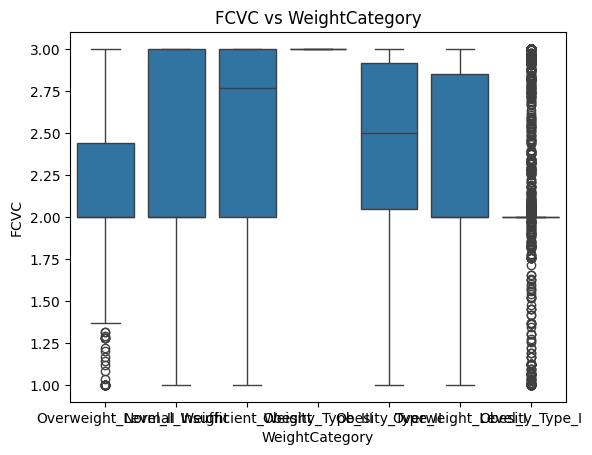

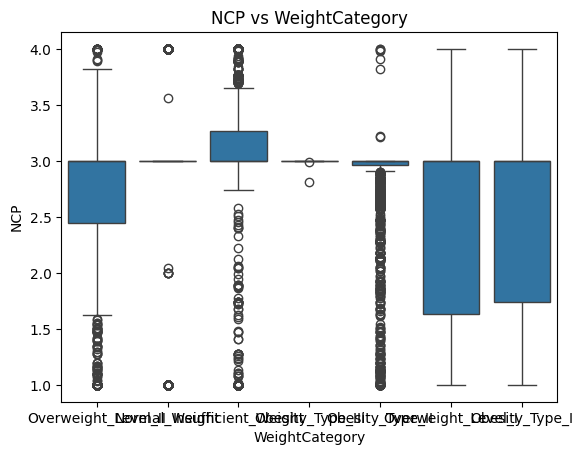

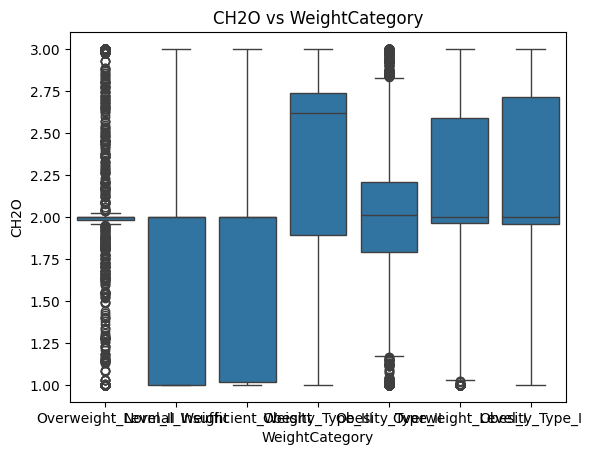

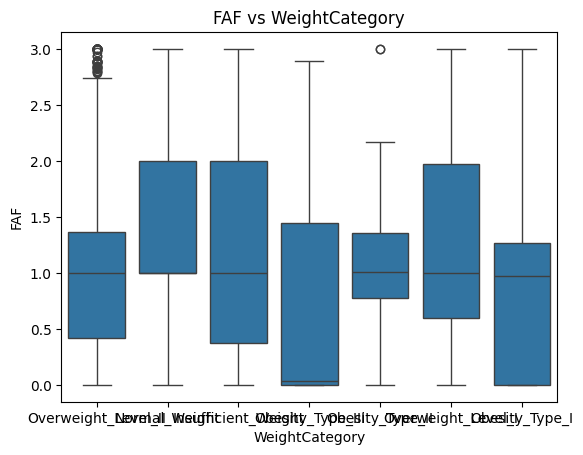

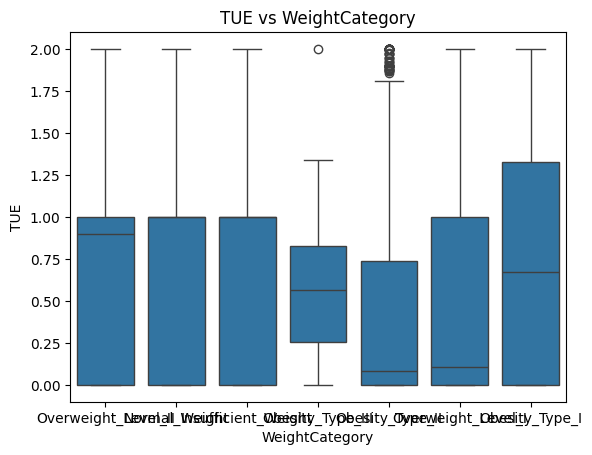

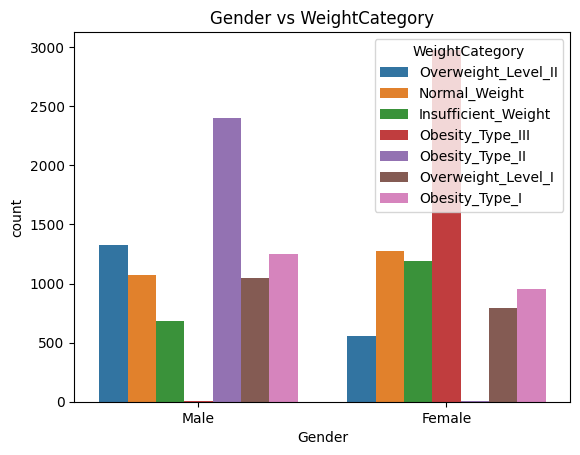

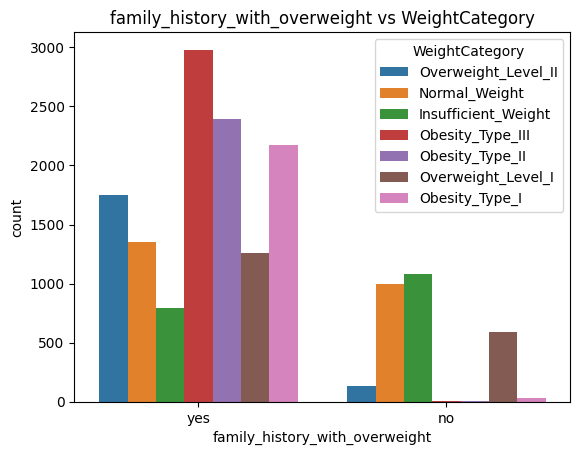

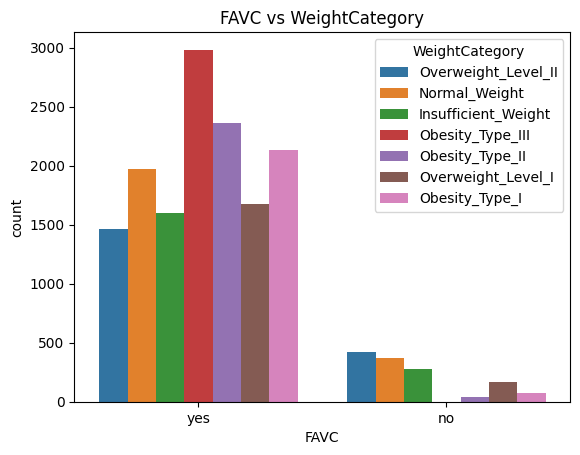

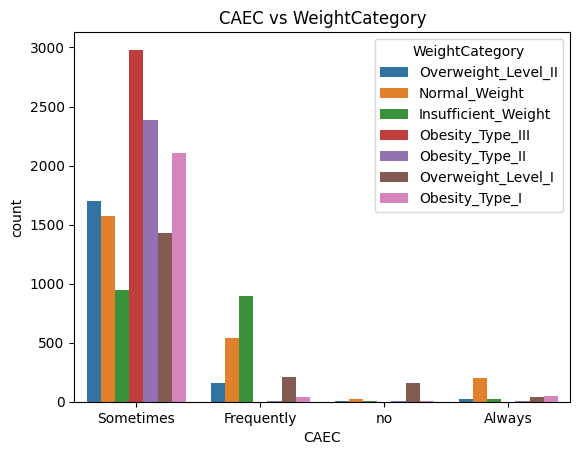

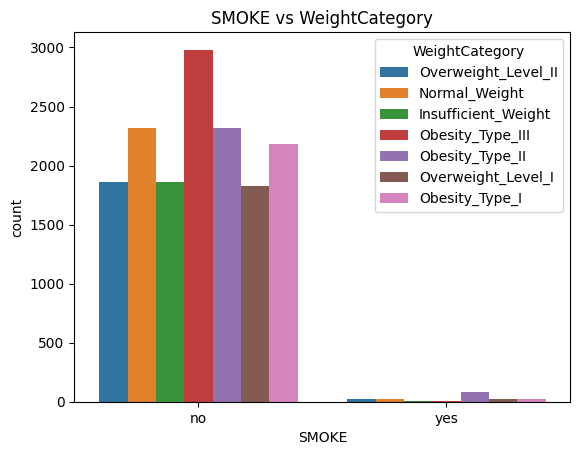

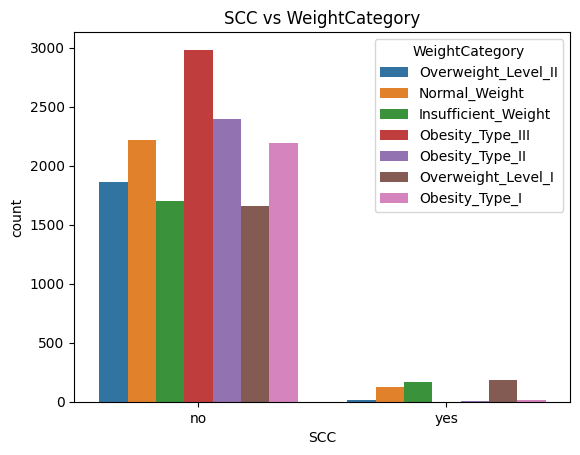

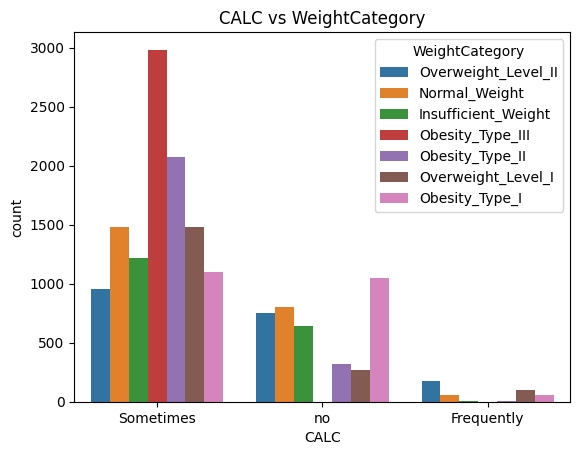

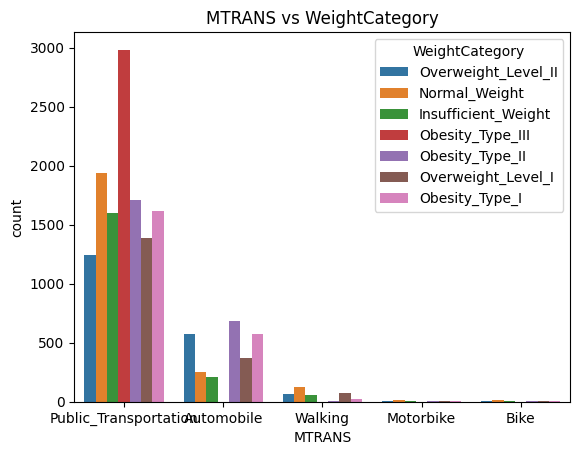

In [ ]:
#Bivariate Analysis
# Numerical vs Target
for col in numerical_cols:
    sb.boxplot(x='WeightCategory', y=col, data=df)
    plt.title(f"{col} vs WeightCategory")
    plt.savefig(f'{col}_vs_weightcategory_boxplot.png')
    plt.show()

# Categorical vs Target
for col in categorical_cols:
    sb.countplot(x=col, hue='WeightCategory', data=df)
    plt.title(f"{col} vs WeightCategory")
    plt.show()

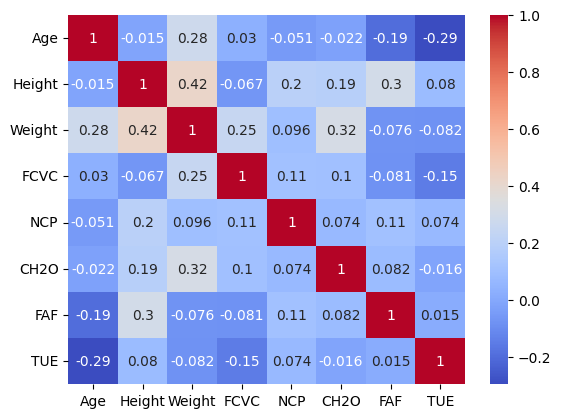

In [ ]:
sb.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.savefig('numerical_correlation_heatmap.png')
plt.show()

Feature Scaling

In [ ]:
df_copy = df.copy()

In [ ]:
# #Min_Max Normalisation
# from sklearn.preprocessing import StandardScaler, MinMaxScaler
# scaler = MinMaxScaler()
# display(df.head())
# df_copy = df.copy()

# df_copy['Age'] = scaler.fit_transform(df[['Age']])
# df_copy['Height'] = scaler.fit_transform(df[['Height']])
# df_copy['Weight'] = scaler.fit_transform(df[['Weight']])
# df_copy['FCVC'] = scaler.fit_transform(df[['FCVC']])
# df_copy['NCP'] = scaler.fit_transform(df[['NCP']])
# df_copy['CH2O'] = scaler.fit_transform(df[['CH2O']])
# df_copy['FAF'] = scaler.fit_transform(df[['FAF']])
# df_copy['TUE'] = scaler.fit_transform(df[['TUE']])
# display(df_copy.head())

Encoding Features

In [ ]:
#Binary Encoding
df_copy['Gender'] = df_copy['Gender'].map({'Male': 1, 'Female': 0})
df_copy['family_history_with_overweight'] = df_copy['family_history_with_overweight'].map({'yes': 1, 'no': 0})
df_copy['FAVC'] = df_copy['FAVC'].map({'yes': 1, 'no': 0})
df_copy['SMOKE'] = df_copy['SMOKE'].map({'yes': 1, 'no': 0})
df_copy['SCC'] = df_copy['SCC'].map({'yes': 1, 'no': 0})
display(df_copy.head())

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,WeightCategory
0,0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,Sometimes,0,2.763573,0,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,Frequently,0,2.000000,0,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,Sometimes,0,1.910378,0,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,0,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,Sometimes,0,1.674061,0,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,1,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,Sometimes,0,1.979848,0,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
# OneHot Encoding
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
cols_to_encode = ['CAEC', 'CALC', 'MTRANS']

encoded_array = encoder.fit_transform(df_copy[cols_to_encode])
encoded_feature_names = encoder.get_feature_names_out(cols_to_encode)
encoded_df = pd.DataFrame(encoded_array, columns=encoded_feature_names, index=df_copy.index)

df_copy = df_copy.drop(columns=cols_to_encode)
df_copy = pd.concat([df_copy, encoded_df], axis=1)

display(df_copy.head())

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,SMOKE,...,WeightCategory,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,0,...,Overweight_Level_II,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,0,...,Normal_Weight,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,0,...,Insufficient_Weight,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,3,0,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,0,...,Obesity_Type_III,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,4,1,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,0,...,Overweight_Level_II,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


Implement Decision Tree for Classification

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = df_copy.drop('WeightCategory', axis=1)
y = df_copy['WeightCategory']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth = 7)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7)

In [ ]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8628755364806867


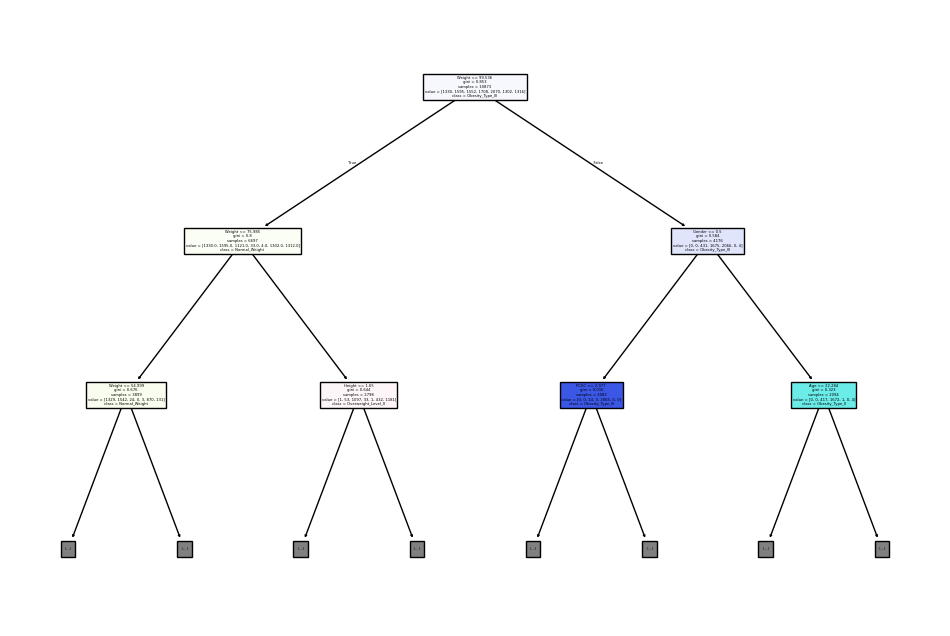

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
tree.plot_tree(model, filled=True, feature_names=X_train.columns, class_names=model.classes_, max_depth = 2)
plt.show()

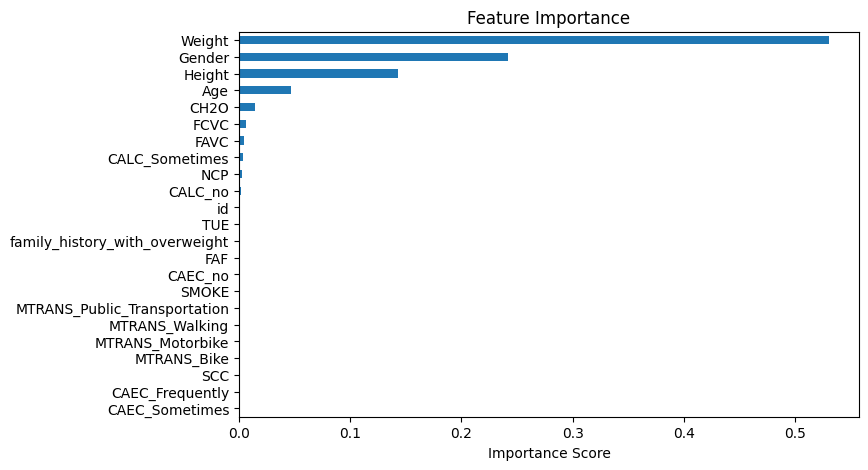

In [ ]:
#Checking feature importances using decision tree
import matplotlib.pyplot as plt
importances = model.feature_importances_

feature_names = X_train.columns

feat_importance = pd.Series(importances, index=feature_names)

feat_importance.sort_values().plot(kind='barh', figsize=(8, 5))
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.show()

Implementing Random Forest